In [4]:
# Hope Loiselle's Code
# your task: annotate it with what you think
# she's trying to do; and compare it with
# Marwick's original paper: what aspect of his analysis
# does this bit of code address, and do your findings
# match up with his?


## see notes for our findings
library(curl)
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2) ## added in

#library(tidyverse) commented out as we kept getting errors
flakes_TL <- read.csv(curl("https://raw.githubusercontent.com/benmarwick/teaching-replication-in-archaeology/refs/heads/master/analysis/supplementary-materials/submitted-assigments/Hope-Loiselle/Tham_Lod_Area_1_lithics-1.csv"), header = TRUE )
flakes_BR <- read.csv(curl("https://raw.githubusercontent.com/benmarwick/teaching-replication-in-archaeology/refs/heads/master/analysis/supplementary-materials/submitted-assigments/Hope-Loiselle/Ban_Rai_Area_3_lithics-1.csv"), header = TRUE) 


Warning message:
“Removed 9657 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


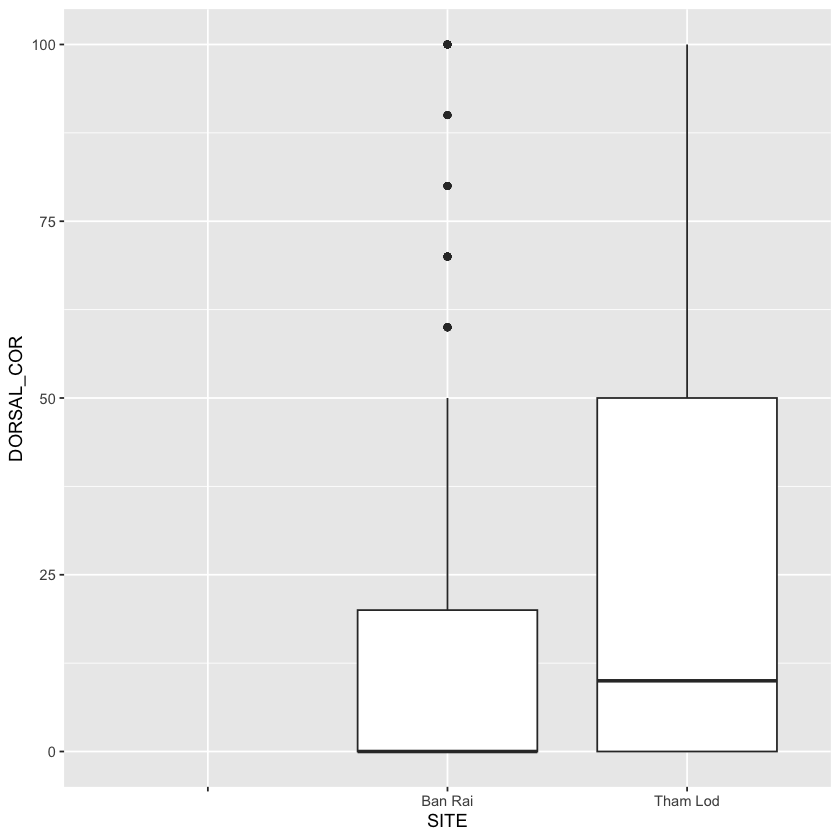

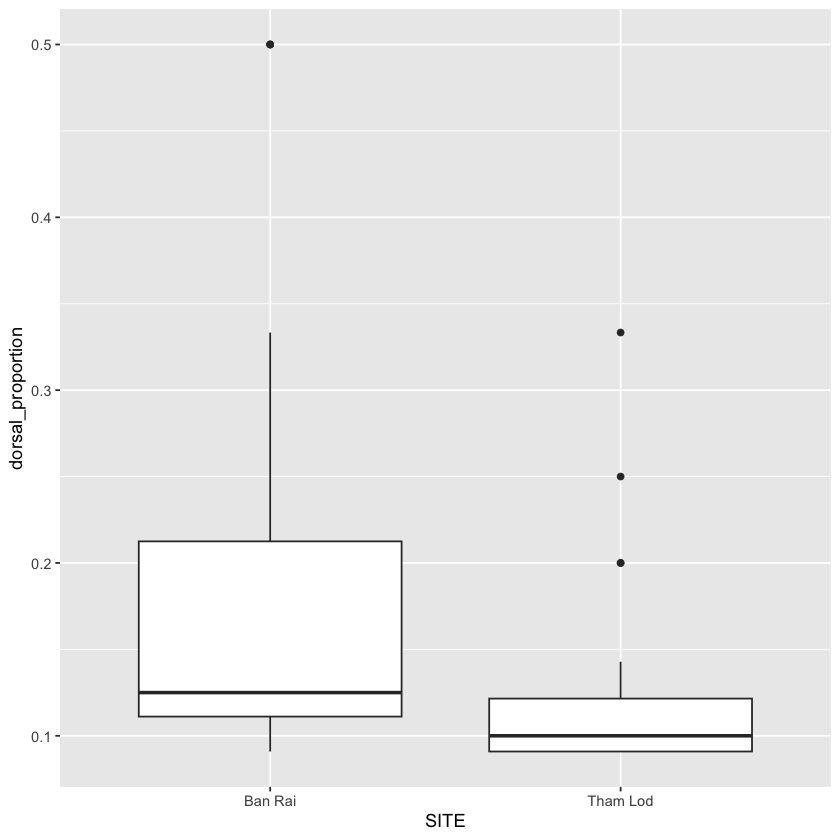

In [5]:

##- new cell

# dorsal cortex and dorsal scars
TL_dorsal <-
  flakes_TL %>%
  select(DORSAL_COR, DORSAL_SCA, SITE, EXCAVATION)

BR_dorsal <-
  flakes_BR %>%
  select(DORSAL_COR, DORSAL_SCA, SITE, EXCAVATION)

TL_BR_dorsal <- bind_rows(TL_dorsal, BR_dorsal)

##- new cell

ggplot(TL_BR_dorsal, aes(SITE, DORSAL_COR)) +
  geom_boxplot()

dorsal_cortex_proportion <-
  TL_BR_dorsal %>%
  group_by(SITE, EXCAVATION, DORSAL_COR) %>%
  tally() %>%
  mutate(DORSAL_COR = ifelse(DORSAL_COR == 0, "zero", "not zero")) %>%
  group_by(SITE, EXCAVATION, DORSAL_COR) %>%
  tally() %>%
  filter(!is.na(DORSAL_COR)) %>%
  spread(DORSAL_COR, n) %>%
  mutate(dorsal_proportion = zero / (`not zero` + zero))

ggplot(dorsal_cortex_proportion, aes(SITE, dorsal_proportion)) +
  geom_boxplot()